## Exploration et Analyse des Données

In [118]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Charger les données à partir d'un fichier CSV
data = pd.read_csv("FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [120]:
# Afficher les informations sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [121]:
# Compter les valeurs manquantes dans chaque colonne
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [122]:
# Sélectionner les colonnes d'intérêt pour l'analyse
data_selected = data[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
# Afficher les cinq premières lignes des données sélectionnées
data_selected.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

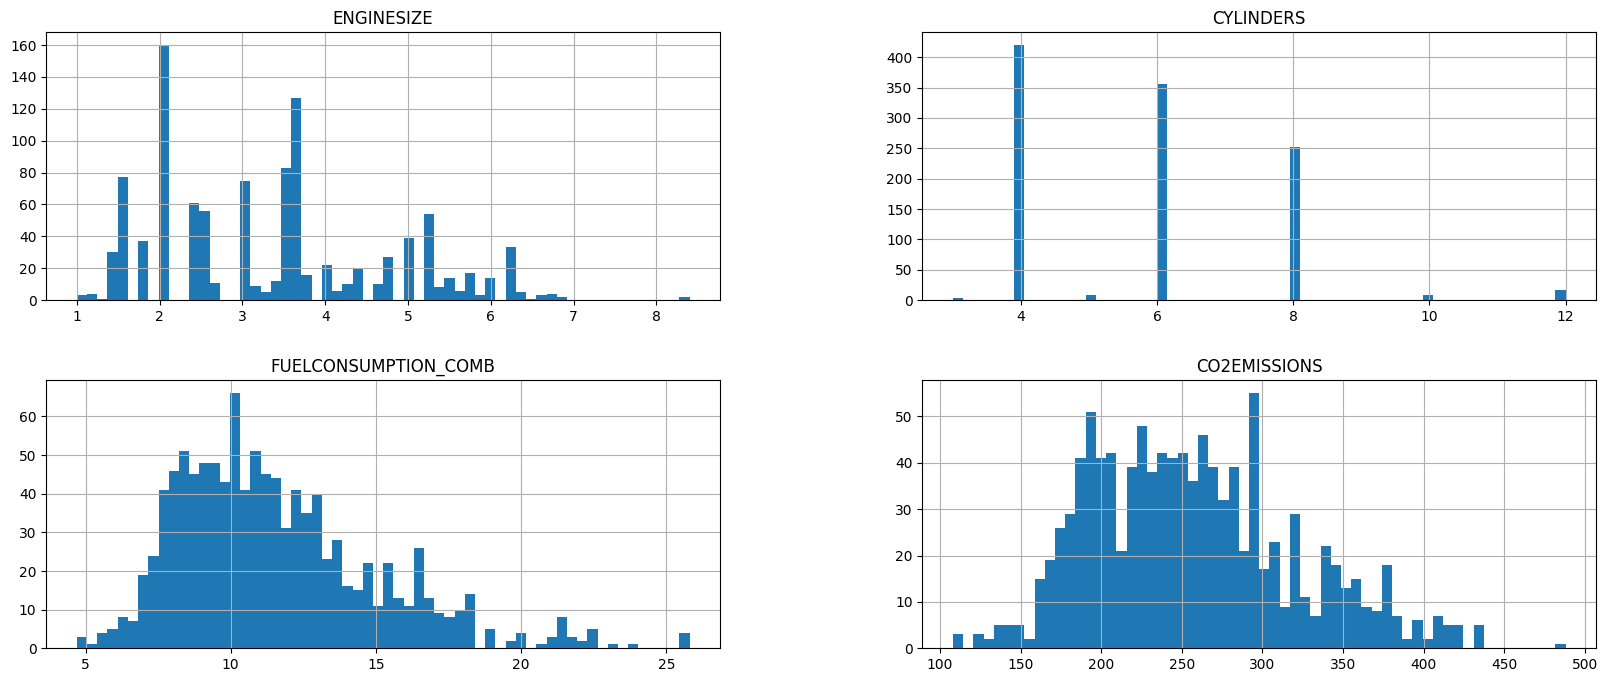

In [123]:
# Créer des histogrammes pour visualiser la distribution des données
data_selected.hist(bins=60, figsize=(20,8))

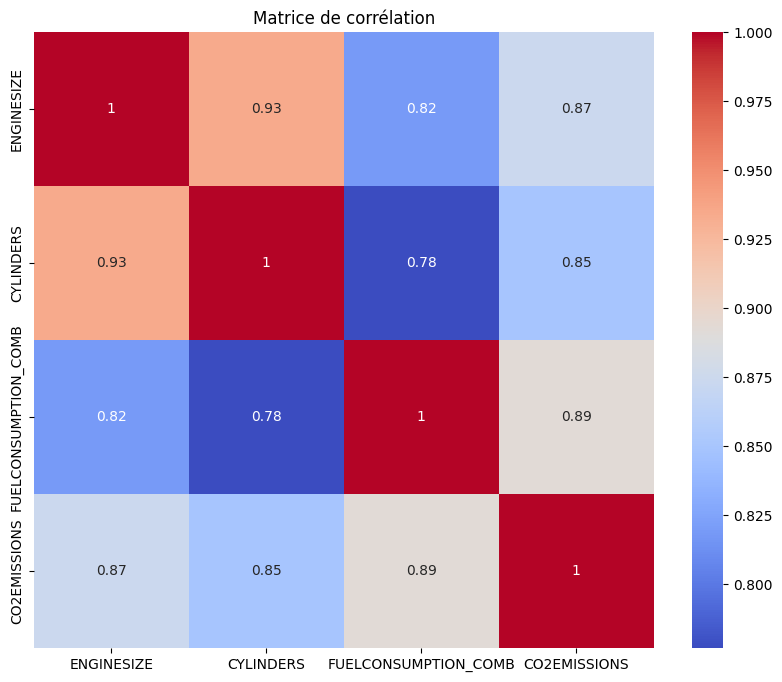

In [124]:
# Calculer la matrice de corrélation pour analyser les relations entre les variables
corr_matrix = data_selected.corr()

# Créer une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matrice de corrélation')
plt.show()

h:\CHALLANGE !\Regressionlinéaire\fuel_consumption\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


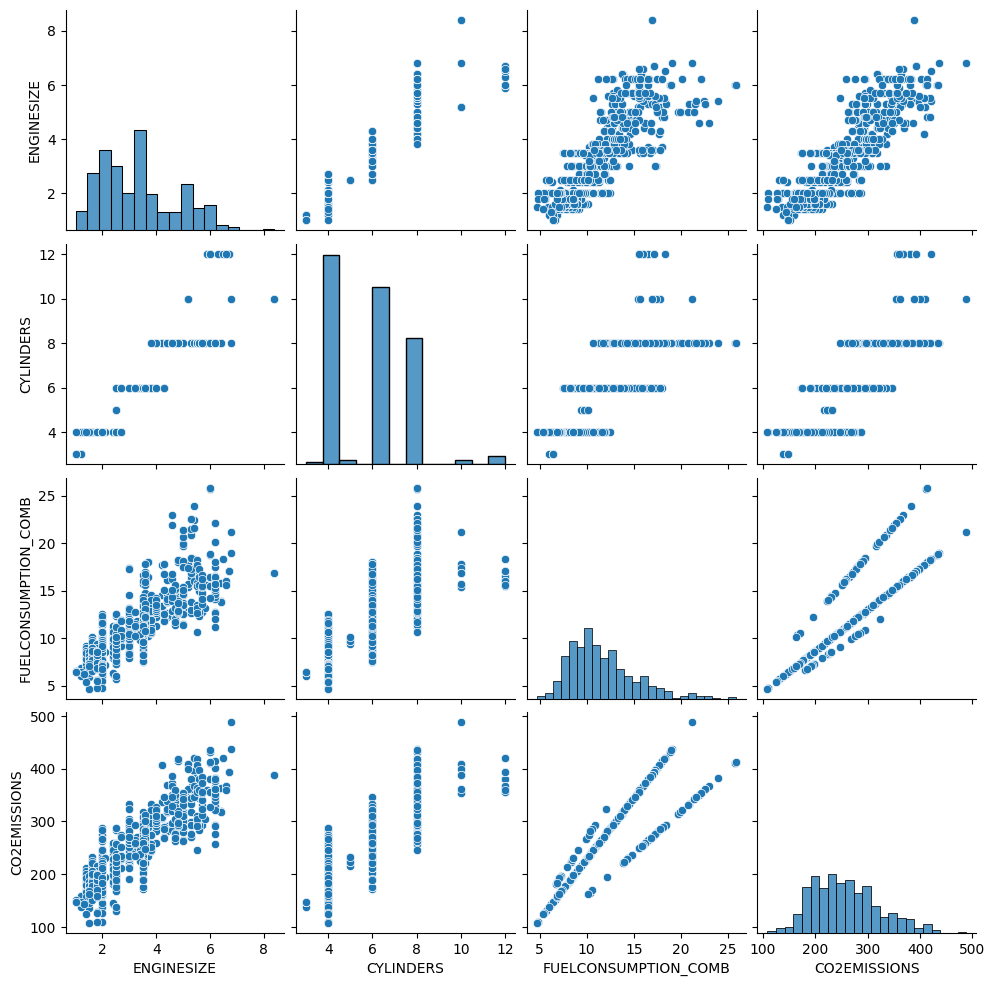

In [125]:
# Créer une paire de graphiques pour examiner plus en détail les relations entre les variables
sns.pairplot(data_selected)
plt.show()

## Standardisation des Données et Entraînement du Modèle

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [127]:
data_selected

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [128]:
# Séparation des caractéristiques d'entrée (X) et de la cible (y)
X = data_selected[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = data_selected['CO2EMISSIONS']


In [129]:
# Division des données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour les tests)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
# Création d'un objet StandardScaler
scaler_x = StandardScaler()

# Ajustement et transformation de l'ensemble d'entraînement
scaler_x.fit(X_train)
X_train_scaled = scaler_x.transform(X_train)

# Transformation de l'ensemble de test en utilisant la même transformation
X_test_scaled= scaler_x.transform(X_test)


In [131]:
# Transformation de la cible (y) en valeurs standardisées
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


### Entraînement du Modèle de Régression Linéaire

In [132]:
# Création d'un modèle de régression linéaire
regression_model = LinearRegression()

# Entraînement du modèle sur les données d'entraînement standardisées
regression_model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

## Évaluation du Modèle

In [140]:
# Prédictions sur l'ensemble de test standardisé
y_pred = regression_model.predict(X_test_scaled)

# Calcul de l'Erreur Quadratique Moyenne (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)
print("Erreur quadratique moyenne (MSE) :", mse)

# Calcul du Coefficient de Détermination (R2)
r2 = r2_score(y_test_scaled, y_pred)
print(f"Coefficient de détermination (R2) : {r2}")


Erreur quadratique moyenne (MSE) : 0.12897984690922595
Coefficient de détermination (R2) : 0.8759705206914069


### Sauvegarde du modèle et des scalers pour une utilisation future dans une API


In [134]:

import pickle 
with open('model.pkl', 'wb') as f:
    pickle.dump(regression_model, f)

with open("scaler_x.pkl", 'wb') as f:
    pickle.dump(scaler_x, f)

with open("scaler_y.pkl", 'wb') as f:
    pickle.dump(scaler_y, f)
